<a href="https://colab.research.google.com/github/nazihkhelifa/HW/blob/main/Capacited_clustering_porblem_using_Branch_and_Cut_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capacited clustering porblem using Branch and Cut algorithm

Problem Description
The Capacitated Clustering Problem (CCP) consists of forming a specified number of clusters or groups from a set of elements in such a way that the sum of the weights of the elements in each cluster is within some capacity limits, and the sum of the benefits between the pairs of elements in the same cluster is maximized. This problem arises in the context of facility planners at mail processing and distribution. The Maximally Diverse Grouping Problem (MDGP) is a special case of the CCP in which all the elements have a weight of one unit.
Given a graph G = (V, E) where V is a set of n nodes and E is a set of edges, let wi ≥ 0 be the weight of node i ∈ V and let cij be the benefit of edge (i, j) ∈ E. The Capacitated Clustering Problem (CCP) consists of partition V into p clusters in such a way that the sum of the weights of the elements in each cluster is within some integer capacity limits, L and U, and the sum of the benefits between the pairs of elements in the same cluster is maximized.
The CCP can be formulated as a quadratic integer program with binary variables xik that take the value of 1 if element i is in cluster k and 0 otherwise.



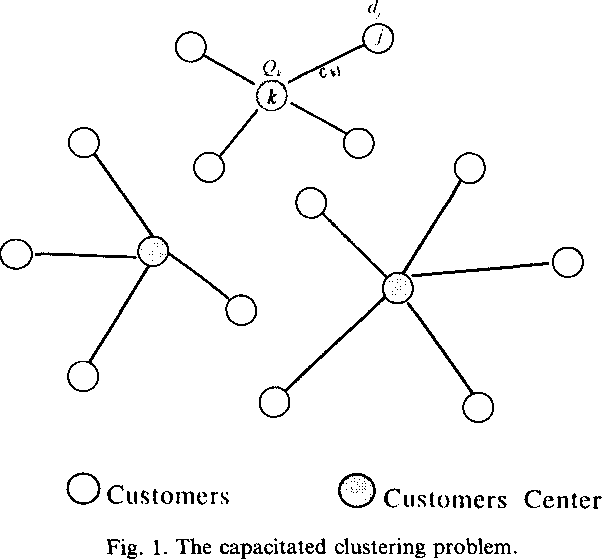


In [ ]:
pip install cplex docplex

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import time

from scipy.spatial import distance_matrix

# In[14]:


import sys
import docplex.mp

# try:
#     import docplex.mp
# except:
#     if hasattr(sys, 'real_prefix'):
#         get_ipython().system('pip install docplex -q')
#     else:
#         get_ipython().system('pip install --user docplex -q')

from docplex.mp.model import Model






for file in file_names:
  file_name = os.path.join(dir_name, 'Sample Dataset\\', file + '.csv')
  df = pd.read_csv(file_name, encoding='latin1', error_bad_lines=False)

cust_size = df.shape[0] - 1
   
    # print('Number of customers:', cust_size)
n = cust_size
    #df2 for coord 
df2 = df.iloc[:, 1:3]
df2.loc[n + 1, :] = df2.loc[0, :]

dist_matrix = pd.DataFrame(distance_matrix(df2.values, df2.values), index=df2.index, columns=df2.index)


#Custmer nodes
C = [i for i in range(1, n + 1)]
#Total nodes
Cc = [0] + C + [n + 1]

#number of vehicles and limit capacity
V = [i for i in range(1, 26)]
Q = df['CAPACITY'][0]

    # cluser and thier limit quantity
Clus = [j for j in range(1,4)]
Q = { j: np.random.randint(650,700)  for j in Clus}

    #request = {i: df['DEMAND'][i] for i in range(1, n + 1)}
d = [  df['DEMAND'][i] for i in range(n + 1)]
    #Number of request
R = [i for i in range(len(d))]

  # Variable set
X = [(i, j) for i in R for j in Clus ]
Y = [j for j in Clus ]

   # Variables
x = mdl.binary_var_dict(X, name='x')
y = mdl.binary_var_dict(Y, name='y')

    # Calculate distance, time & cost
c = {(i, j): dist_matrix[i][j] for i in Cc for j in Clus }
t = {(i, j): dist_matrix[i][j] for i in Cc for j in Cc}

COST = {(i, j): np.random.randint(0,1) for i in R for j in Clus}


In [ ]:

#the Clustering optimization model 
time_start = time.time()
mdl = Model('CLUSTER')

#min ( distane between node i and cluster j)* for each node i to the cluter j
mdl.minimize( mdl.sum(c[i,j] * x[i,j] for i,j in X) )
#Ensure that each node have a single cluster 
mdl.add_constraints( mdl.sum(x[i,j] for j in Clus ) == 1 for i in R)
# sum of the total request demands  is less than Q of cluster j
mdl.add_constraints(mdl.sum( d[i] * x[i, j] for i in  range(n + 1) ) <=  Q[j]  for j in Clus   )


In [ ]:
solution = mdl.solve(log_output = True)

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 1 rows and 6 columns.
MIP Presolve modified 6 coefficients.
Reduced MIP has 103 rows, 300 columns, and 600 nonzeros.
Reduced MIP has 300 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.59 ticks)
Found incumbent of value 3309.080884 after 0.01 sec. (1.25 ticks)
Probing time = 0.00 sec. (0.09 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 103 rows, 300 columns, and 600 nonzeros.
Reduced MIP has 300 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.45 ticks)
Probing time = 0.00 sec. (0.09 ticks)
Clique table members: 100.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Root relaxation solution time = 0.00 sec. (0.22 ticks)

        Nodes                                 

In [ ]:
print(solution)

solution for: CLUSTER
objective: 3158.85
x_0_3=1
x_1_1=1
x_2_2=1
x_3_3=1
x_4_3=1
x_5_3=1
x_6_2=1
x_7_3=1
x_8_3=1
x_9_3=1
x_10_3=1
x_11_3=1
x_12_2=1
x_13_2=1
x_14_2=1
x_15_2=1
x_16_2=1
x_17_2=1
x_18_2=1
x_19_2=1
x_20_3=1
x_21_3=1
x_22_3=1
x_23_3=1
x_24_3=1
x_25_1=1
x_26_3=1
x_27_3=1
x_28_3=1
x_29_3=1
x_30_3=1
x_31_3=1
x_32_3=1
x_33_1=1
x_34_3=1
x_35_3=1
x_36_3=1
x_37_3=1
x_38_3=1
x_39_3=1
x_40_3=1
x_41_3=1
x_42_3=1
x_43_3=1
x_44_3=1
x_45_3=1
x_46_1=1
x_47_3=1
x_48_3=1
x_49_3=1
x_50_3=1
x_51_3=1
x_52_3=1
x_53_3=1
x_54_1=1
x_55_3=1
x_56_1=1
x_57_1=1
x_58_1=1
x_59_3=1
x_60_3=1
x_61_3=1
x_62_1=1
x_63_1=1
x_64_3=1
x_65_3=1
x_66_3=1
x_67_3=1
x_68_3=1
x_69_3=1
x_70_1=1
x_71_1=1
x_72_3=1
x_73_1=1
x_74_1=1
x_75_1=1
x_76_1=1
x_77_1=1
x_78_1=1
x_79_1=1
x_80_1=1
x_81_1=1
x_82_1=1
x_83_1=1
x_84_1=1
x_85_2=1
x_86_1=1
x_87_1=1
x_88_2=1
x_89_1=1
x_90_1=1
x_91_1=1
x_92_2=1
x_93_2=1
x_94_2=1
x_95_2=1
x_96_2=1
x_97_2=1
x_98_2=1
x_99_2=1
x_100_2=1



In [ ]:
CLUS_1 = [x[i,1] for i in R if x[i, 1].solution_value == 1]

In [ ]:
CLUS_2 = [x[i,2] for i in R if x[i, 2].solution_value == 1]

In [ ]:
#clus nodes 
i_1 =[]
i_2 =[]
i_3 =[]

CLUS_1 = [x[i,1] for i in R if x[i, 1].solution_value == 1]
CLUS_2 = [x[i,2] for i in R if x[i, 2].solution_value == 1]
CLUS_3 = [x[i,3] for i in R if x[i, 1].solution_value == 1]

active_cluster =[  a for a in X if x[a].solution_value> 0.9]

for i,j in active_cluster:
  if j ==1:
    i_1.append(i)
  if j ==2:
    i_2.append(i) 
  if j ==3:
    i_3.append(i)

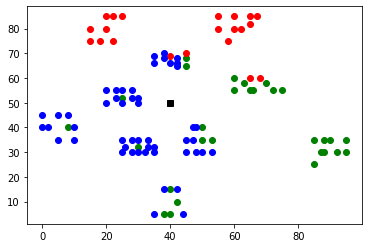

In [ ]:
plt.scatter(df["XCOORD"][1:],df["YCOORD"][1:],c='b')
for i in C:
  plt.annotate('$d_%d=%d$'%(i,d[i]),(df["XCOORD"][i]+2,df["YCOORD"][i]))

#for each i,j in active_cluster

for i in i_1 :
#Coloring the active arcs
  plt.scatter(df["XCOORD"][i],df["YCOORD"][i] ,c='g')
for i in i_2 :
#Coloring the active arcs
  plt.scatter(df["XCOORD"][i],df["YCOORD"][i] ,c='r')

for i in i_3 :
#Coloring the active arcs
  plt.scatter(df["XCOORD"][i],df["YCOORD"][i] ,c='b')


plt.plot(df["XCOORD"][0],df["YCOORD"][0],c='k' ,marker='s')
#Plotting the solution


plt.show()


In [ ]:

print('the total demand', np.sum(df["DEMAND"][i_1]) + np.sum(df["DEMAND"][i_2]) +np.sum(df["DEMAND"][i_3]))
print('CLUS1 large' ,Q[1] )
print('CLUS1 large' ,Q[2] )
print('CLUS1 large' ,Q[3] )
print('total Clusters large' ,Q[1] +Q[2] +Q[3] )
